# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [43]:
# Create empty lists for columns in output_data file
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat_list = []
lng_list = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
print("Beginning Data Retrieval")
print("-----------------------------")

# Set up base and query URLs for API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Loop for each city in cities list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
    
    except(KeyError, IndexError):
        print(f"City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 : agadir
Processing Record 2 of Set 1 : georgetown
Processing Record 3 of Set 1 : barrow
Processing Record 4 of Set 1 : punta arenas
Processing Record 5 of Set 1 : butaritari
Processing Record 6 of Set 1 : arraial do cabo
City not found. Skipping...
Processing Record 7 of Set 1 : cabo san lucas
Processing Record 8 of Set 1 : rikitea
Processing Record 9 of Set 1 : hasaki
Processing Record 10 of Set 1 : mehamn
Processing Record 11 of Set 1 : narsaq
Processing Record 12 of Set 1 : tasiilaq
City not found. Skipping...
Processing Record 13 of Set 1 : saskylakh
Processing Record 14 of Set 1 : inndyr
Processing Record 15 of Set 1 : mahebourg
Processing Record 16 of Set 1 : vuktyl
Processing Record 17 of Set 1 : nicoya
Processing Record 18 of Set 1 : gudivada
Processing Record 19 of Set 1 : chokurdakh
Processing Record 20 of Set 1 : san vicente
Processing Record 21 of Set 1 : kapaa
City not found. Skipping...
P

Processing Record 35 of Set 4 : santa rosa
Processing Record 36 of Set 4 : saint-francois
Processing Record 37 of Set 4 : atikokan
Processing Record 38 of Set 4 : kilindoni
Processing Record 39 of Set 4 : stornoway
Processing Record 40 of Set 4 : port alfred
Processing Record 41 of Set 4 : frontino
Processing Record 42 of Set 4 : constitucion
Processing Record 43 of Set 4 : thinadhoo
Processing Record 44 of Set 4 : mizan teferi
Processing Record 45 of Set 4 : harper
Processing Record 46 of Set 4 : rio grande
Processing Record 47 of Set 4 : den helder
Processing Record 48 of Set 4 : auki
Processing Record 49 of Set 4 : carutapera
Processing Record 50 of Set 4 : lipin bor
Processing Record 0 of Set 5 : moindou
Processing Record 1 of Set 5 : pipirig
Processing Record 2 of Set 5 : sitka
Processing Record 3 of Set 5 : la ronge
Processing Record 4 of Set 5 : twentynine palms
Processing Record 5 of Set 5 : sooke
City not found. Skipping...
Processing Record 6 of Set 5 : dicabisagan
Processing

Processing Record 16 of Set 8 : belaya gora
Processing Record 17 of Set 8 : port blair
Processing Record 18 of Set 8 : pacifica
Processing Record 19 of Set 8 : dire dawa
Processing Record 20 of Set 8 : deputatskiy
Processing Record 21 of Set 8 : shadrinsk
Processing Record 22 of Set 8 : galle
Processing Record 23 of Set 8 : korla
Processing Record 24 of Set 8 : grand baie
City not found. Skipping...
Processing Record 25 of Set 8 : fortuna
City not found. Skipping...
Processing Record 26 of Set 8 : olafsvik
Processing Record 27 of Set 8 : trabzon
Processing Record 28 of Set 8 : ghorawal
Processing Record 29 of Set 8 : niamey
Processing Record 30 of Set 8 : haines junction
Processing Record 31 of Set 8 : phangnga
City not found. Skipping...
City not found. Skipping...
Processing Record 32 of Set 8 : inta
Processing Record 33 of Set 8 : qasigiannguit
Processing Record 34 of Set 8 : fairbanks
Processing Record 35 of Set 8 : college
Processing Record 36 of Set 8 : kulhudhuffushi
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
# Create data frame of retrieved data
weather_df = pd.DataFrame({" City": city_name, 
                           "Lat": lat_list, 
                           "Lng": lng_list, 
                           "Max Temp": max_temp, 
                           "Humidity": humidity, 
                           "Cloudiness": cloudiness, 
                           "Wind Speed": wind_speed, 
                           "Country": country, 
                           "Date": date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Cruz,30.4202,-9.5982,66.20,77,20,13.80,MA,1618690888
1,George Town,5.4112,100.3354,82.00,89,20,5.75,MY,1618690851
2,Barrow,71.2906,-156.7887,26.60,80,1,13.80,US,1618691095
3,Punta Arenas,-53.1500,-70.9167,51.80,66,75,6.91,CL,1618690874
4,Butaritari,3.0707,172.7902,82.22,75,100,6.89,KI,1618691096


In [46]:
stats = weather_df.describe()
stats_df = pd.DataFrame(stats)
stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,5.390000e+02
mean,18.766156,20.854091,60.903525,67.948052,51.033395,7.828367,1.618691e+09
std,33.071504,90.600324,21.929670,22.402309,39.506609,5.346587,1.056903e+02
min,-54.800000,-179.166700,-22.590000,4.000000,0.000000,0.380000,1.618691e+09
25%,-8.708800,-58.635000,48.065000,55.000000,9.000000,3.780000,1.618691e+09
50%,19.300300,27.274300,66.200000,74.000000,41.000000,6.890000,1.618691e+09
75%,47.387700,98.858050,78.115000,86.000000,91.500000,10.625000,1.618691e+09
max,78.218600,178.416700,100.400000,100.000000,100.000000,35.010000,1.618691e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [47]:
# Can skip this step as max humidity in stats_df is not >100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

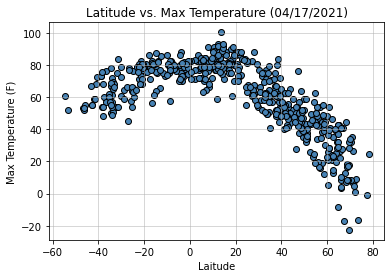

In [48]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Max Temperature (04/17/2021)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

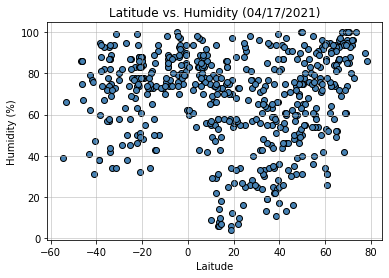

In [49]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Humidity (04/17/2021)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

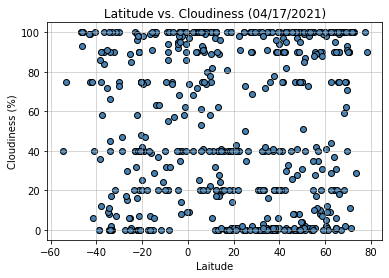

In [50]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Cloudiness (04/17/2021)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

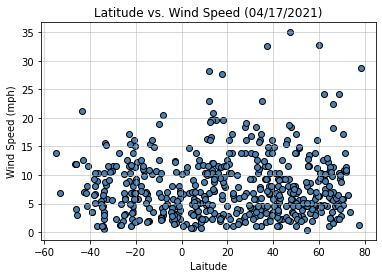

In [51]:
# Create Latitude vs. Wind Speed Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Wind Speed (04/17/2021)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude vs Wind Speed.png")

## Linear Regression

In [54]:
# Linear regressions will be looked at for Nothern and Southern hemispheres
# Create data frames for norther and southern hemisphere specific data
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

#Define linear regression and scatter plot functions to be used for all hemisphere and weather models
def linear_agression(x,y):
    print(f"The r-squared value is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    return line_eq

# Define an annotating function
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b), fontsize=15, color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is : -0.88


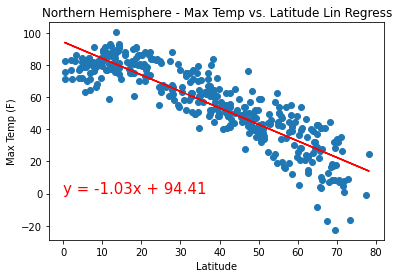

In [55]:
# Create equation for Max Temp vs. Latitude Linear Regression plot
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Annotate line equation for plot
annotate(equation, 0, 0)

# Label plot
plt.title("Northern Hemisphere - Max Temp vs. Latitude Lin Regress")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

#Save figure as png file
plt.savefig("Images/Northern Hemisphere - Max Temp vs Latitude Lin Regress.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is : 0.66


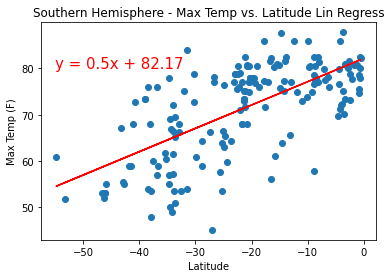

In [59]:
# Create equation for Max Temp vs. Latitude Linear Regression plot
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Annotate line equation for plot
annotate(equation, -55, 80)

# Label plot
plt.title("Southern Hemisphere - Max Temp vs. Latitude Lin Regress")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

#Save figure as png file
plt.savefig("Images/Southern Hemisphere - Max Temp vs Latitude Lin Regress.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is : 0.22


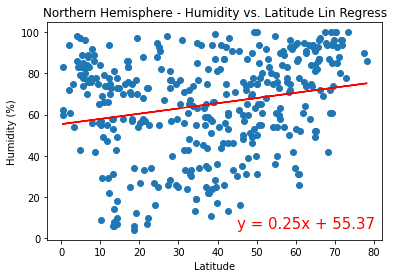

In [63]:
# Create equation for Humidity vs. Latitude Linear Regression plot
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Annotate line equation for plot
annotate(equation, 45, 5)

# Label plot
plt.title("Northern Hemisphere - Humidity vs. Latitude Lin Regress")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save figure as png file
plt.savefig("Images/Northern Hemisphere - Humidity vs Latitude Lin Regress.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is : 0.29


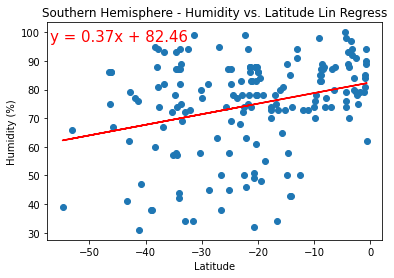

In [69]:
# Create equation for Humidity vs. Latitude Linear Regression plot
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Annotate line equation for plot
annotate(equation, -57, 97)

# Label plot
plt.title("Southern Hemisphere - Humidity vs. Latitude Lin Regress")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save figure as png file
plt.savefig("Images/Southern Hemisphere - Humidity vs Latitude Lin Regress.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is : 0.02


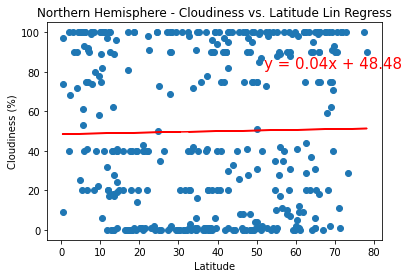

In [71]:
# Create equation for Cloudiness vs. Latitude Linear Regression plot
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Annotate line equation for plot
annotate(equation, 52, 82)

# Label plot
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Lin Regress")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Save figure as png file
plt.savefig("Images/Northern Hemisphere - Cloudiness vs Latitude Lin Regress.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is : 0.08


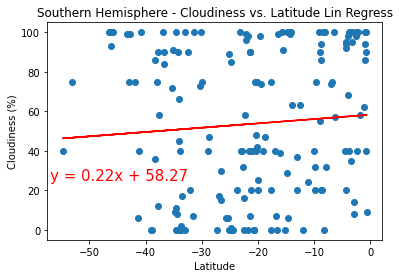

In [73]:
# Create equation for Cloudiness vs. Latitude Linear Regression plot
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Annotate line equation for plot
annotate(equation, -57, 25)

# Label plot
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Lin Regress")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#Save figure as png file
plt.savefig("Images/Southern Hemisphere - Cloudiness vs Latitude Lin Regress.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is : 0.01


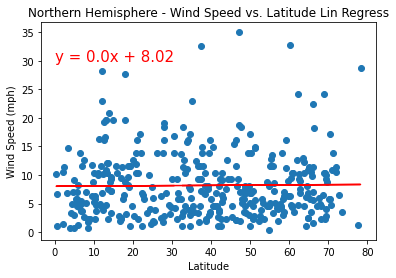

In [76]:
# Create equation for Wind Speed vs. Latitude Linear Regression plot
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Annotate line equation for plot
annotate(equation, 0, 30)

# Label plot
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Lin Regress")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Save figure as png file
plt.savefig("Images/Northern Hemisphere - Wind Speed vs Latitude Lin Regress.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is : -0.15


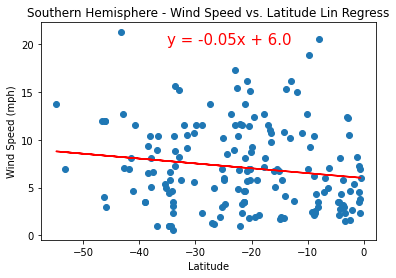

In [79]:
# Create equation for Wind Speed vs. Latitude Linear Regression plot
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Annotate line equation for plot
annotate(equation, -35, 20)

# Label plot
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Lin Regress")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Save figure as png file
plt.savefig("Images/Southern Hemisphere - Wind Speed vs Latitude Lin Regress.png")